# Validation of Nowicki Jessee (2017)

In this section, we demonstrate that our implementation of the Nowicki Jessee (2017) model yields the same output as results reported in the original paper. There may be slight differences due to different shakemap versions or minor differences in the exact colorbars used.

Note that the original Nowicki Jessee (2017) model outputs relative hazard (0 to 1), but we require a value with a clear statistical meaning so we used the transfer function proposed by Nowicki Jessee (2017) to convert the original model to areal coverage. Here we validate against relative hazard because the areal coverage output is not shown in any figures in the original publication.

### References
Nowicki Jessee, M.A., 2017, An Investigation of Seismic Hazard: Using Geophysical Data to Predict the Location and Impact of Earthquake-induced Landslides Around the Globe and to Estimate Earthquake Potential in the Philippines: Ph.D. dissertation, Indiana University. 

## Loma Prieta earthquake



In [9]:
#stdlib imports
from configobj import ConfigObj
import os
import pprint
import matplotlib.cm as cm

#local imports
from gfail.godt import godt2008
from gfail.logisticmodel import LogisticModel
from gfail.conf import correct_config_filepaths
from gfail.utilities import parseConfigLayers, parseMapConfig
from gfail import makemaps

import warnings
warnings.filterwarnings('ignore')

# Set up file paths
# Directory containing model inputs
datadir = 'data/model_inputs/lomaprieta'
# Path to mapping inputs for static plots
map_inputs = 'data/mapping_inputs/lomaprieta'

# Path to config files
configfileJ = '../defaultconfigfiles/models/jessee_2017.ini'
mapconfig = '../defaultconfigfiles/mapconfig.ini'

# Path to shakemap .xml files
shakefile = 'data/shakemaps/lomaprieta.xml'

In [2]:
# Read in the config file for this model. This contains all of the information needed to run the model
config = ConfigObj(configfileJ)

# append the data directory to the relative paths in the config file
config = correct_config_filepaths(datadir, config)
# View the config file
#pprint.pprint(config)

# Turn off conversion to areal coverage in config file
del config['jessee_2017']['coverage']

bounds = dict(xmin=-124.5, xmax=-119.5, ymin=35, ymax=39)

In [3]:
# Run the model (this will take a minute)
lmn = LogisticModel(shakefile, config, saveinputs=True, bounds=bounds)
maplayers = lmn.calculate()

Loading slope layer: 0.7 sec
Loading cti layer: 0.4 sec
Loading landcover layer: 0.6 sec
Loading rock layer: 0.7 sec


### Change bins to match figure from paper


In [4]:
lims = [[0., 0.1, 0.3, 0.5, 0.7, 0.9, 1.]]
#colorlist = ['#EFECEF','0E8C45', 'FBD705', 'F68A21', 'ED2128', '9A1C20']  #hex code for colors in figure below
colormap = [cm.RdYlGn_r]

maskthresh = [0.1]  # to represent gray color on figure

### Create the figure

roadfolder not valid - roads will not be displayed

cities file not valid - cities will not be displayed

No output location given, using current directory for outputs

Input boundaries are almost the same as specified boundaries, no cutting needed
Not able to read specified ocean file, will use default ocean masking


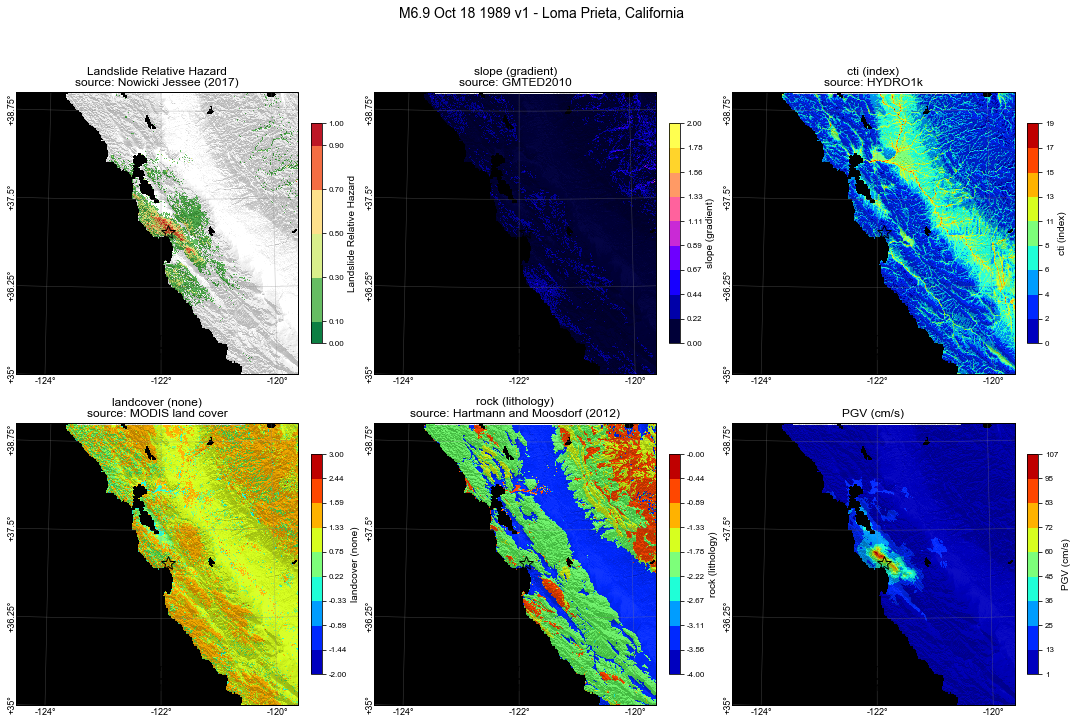

In [5]:
# read in general mapping preferences
mapconfig = ConfigObj(mapconfig)
kwargs = parseMapConfig(mapconfig, fileext=map_inputs)

# get plotting info from config for each layer
plotorder, logscale, lims1, colormaps, maskthreshes = parseConfigLayers(maplayers, config)
lims = lims + lims1[1:]
colormaps = colormap + colormaps[1:]
maskthreshes = maskthresh + maskthreshes[1:]

# Make the figure
temp = makemaps.modelMap(maplayers, shakefile, lims=lims, maskthreshes=maskthreshes, plotorder=plotorder,
         logscale=False, maproads=False, mapcities=False, showplots=True, printparam=False,
         inventory_shapefile=None, scaletype='binned', savepdf=False, savepng=False, boundaries=bounds,
         colormaps=colormaps, **kwargs)

### Compare to the result from the original paper for this event (below)
<img src="data/images/jessee2017_lomaprieta_relative.png" alt="From Paper" style="width: 400px;" align="left"/>

## Wenchuan earthquake

In [6]:
# Path to shakemap .xml files
shakefile2 = 'data/shakemaps/wenchuan.xml'

datadir = 'data/model_inputs/wenchuan'
map_inputs = 'data/mapping_inputs/wenchuan'

# Reload config file with new paths
config2 = ConfigObj(configfileJ)

# append the data directory to the relative paths in the config file
config2 = correct_config_filepaths(datadir, config2)

# Turn off conversion to areal coverage in config file
del config2['jessee_2017']['coverage']

# read in general mapping preferences
kwargs2 = parseMapConfig(mapconfig, fileext=map_inputs)

roadfolder not valid - roads will not be displayed

cities file not valid - cities will not be displayed



In [7]:
bounds2 = dict(xmin=102, xmax=105.8, ymin=30.2, ymax=33.7)

# Run the model (this will take a minute)
lmn2 = LogisticModel(shakefile2, config2, saveinputs=True, bounds=bounds2)
maplayers2 = lmn2.calculate()

Loading slope layer: 0.6 sec
Loading cti layer: 0.4 sec
Loading landcover layer: 0.5 sec
Loading rock layer: 0.5 sec


No output location given, using current directory for outputs

Input boundaries are almost the same as specified boundaries, no cutting needed
Not able to read specified ocean file, will use default ocean masking


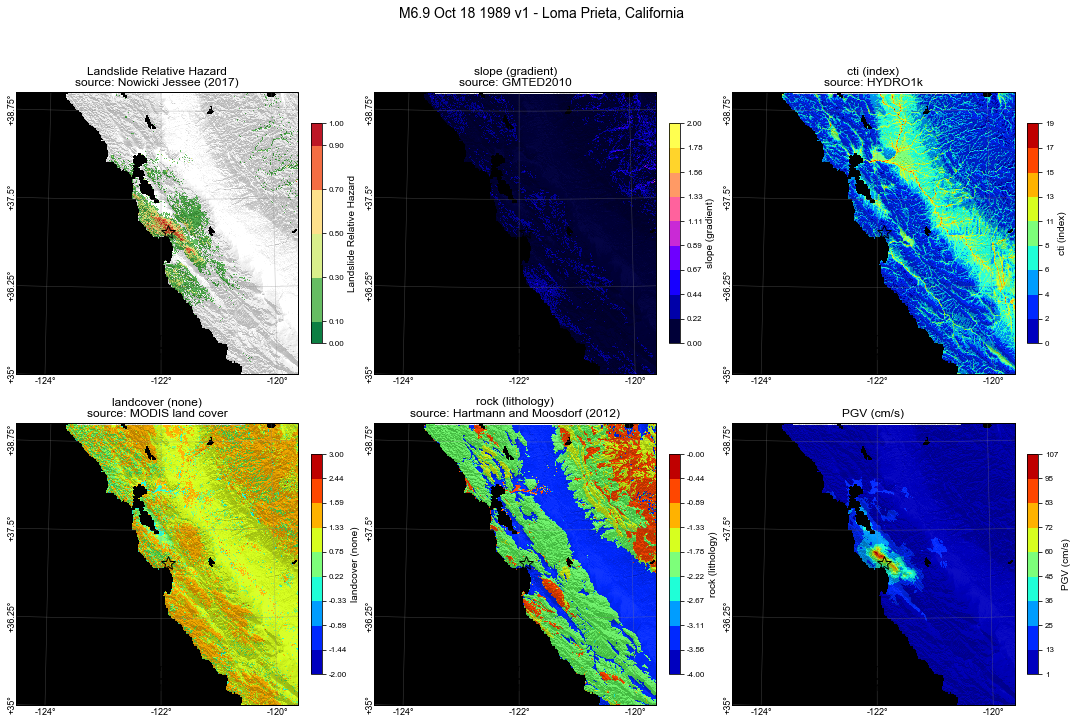

In [8]:
# Make the figure
temp = makemaps.modelMap(maplayers, shakefile, lims=lims, maskthreshes=maskthreshes, plotorder=plotorder,
         logscale=False, maproads=False, mapcities=False, showplots=True, printparam=False,
         inventory_shapefile=None, scaletype='binned', savepdf=False, savepng=False, boundaries=bounds,
         colormaps=colormaps, **kwargs)


### Compare to the result from the original paper for this event (below)
<img src="data/images/jessee2017_wenchuan_relative.png" alt="From Paper" style="width: 400px;" align="left"/>